**Churn Prediction for Bank Customer**

**Dataset Info**


We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

*The features in the given dataset are:*

**rownumber:** Row Numbers from 1 to 10000.


**customerid:** A unique ID that identifies each customer.

**surname:** The customer’s surname.


**creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.


**geography:** The country from which the customer belongs to.


**Gender:** The customer’s gender: Male, Female


**Age:** The customer’s current age, in years, at the time of being customer.


**tenure:** The number of years for which the customer has been with the bank.


**balance:** Bank balance of the customer.


**numofproducts:** the number of bank products the customer is utilising.


**hascrcard:** The number of credit cards given to the customer by the bank.


**isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")


**exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# in order to set the parameters that control the general style of the plots. 
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")

# in order to set the value of the specified option.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#  to set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

# Loading DataSet

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df.describe(include = "O")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
df.drop(["RowNumber","CustomerId", "Surname"], axis=1, inplace = True)

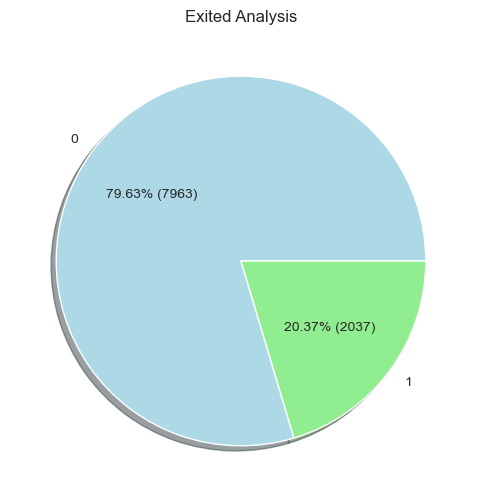

In [10]:
# Exited kategorilerine göre gruplama ve sayma
Type = df.groupby("Exited").size()

# Renklerin belirlenmesi
colors = ["lightblue", "lightgreen"]

# Pie plot çizme
Type.plot(kind = "pie", title = "Exited Analysis", ylabel = "", figsize = [10, 6],
          autopct = lambda p: "{:.2f}% ({:.0f})".format(p, (p / 100) * Type.sum()),
          colors = colors, shadow = True)
plt.savefig("piechart")

# Pie chart'i gösterme
plt.show()

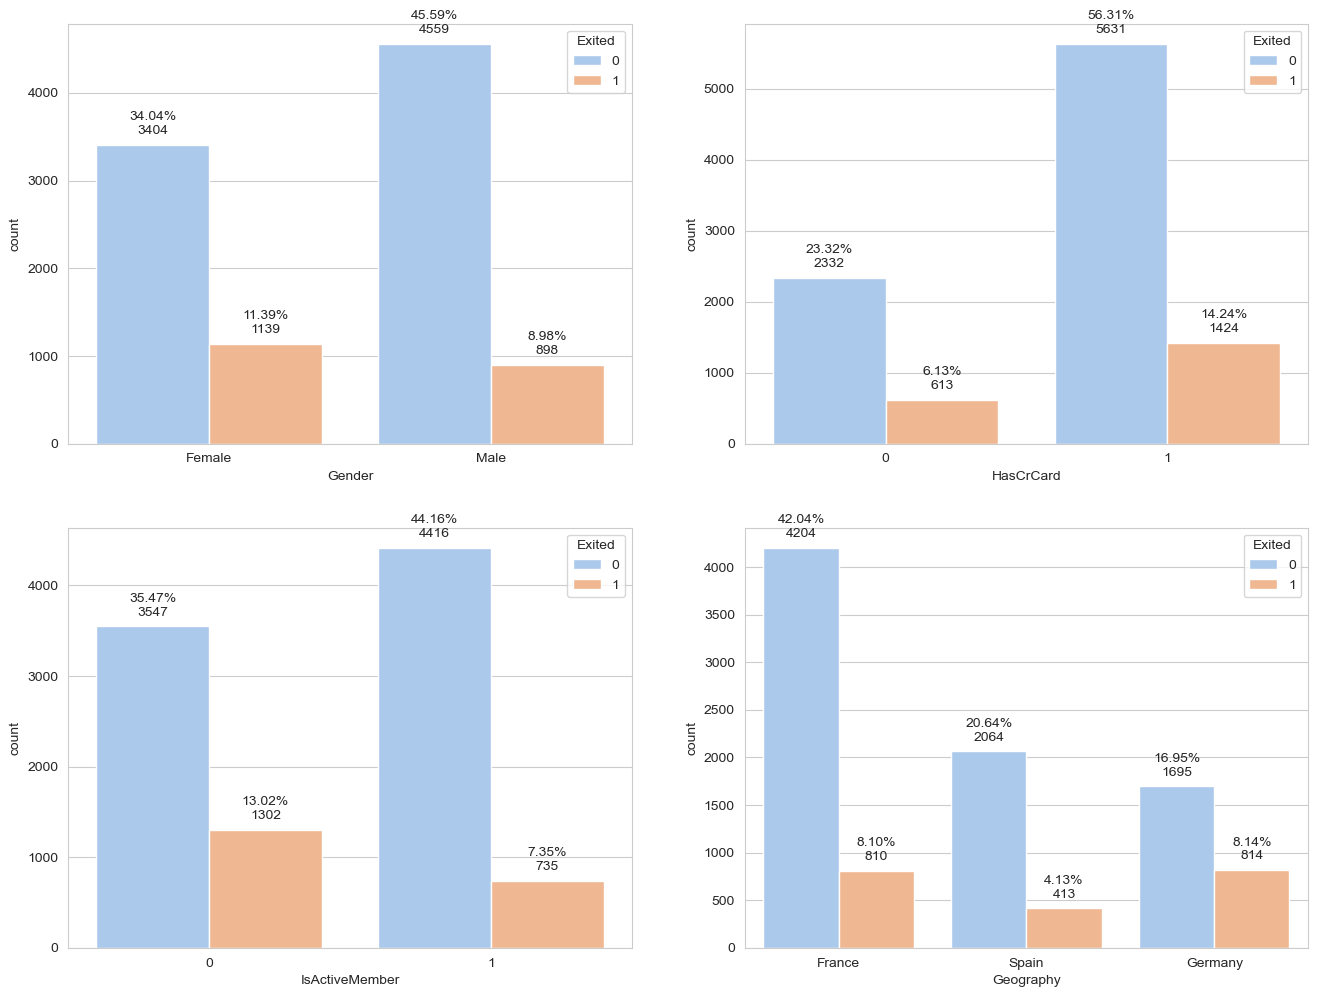

In [11]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize = (16, 12))

toplam_gozlem_sayisi = len(df)

for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data = df, x = i, hue = "Exited", palette = "pastel")
    for p in ax.patches:
        yuzde_degeri = 100 * p.get_height() / toplam_gozlem_sayisi
        ax.annotate(f'{yuzde_degeri:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = "center", va = "center", xytext = (0, 20), textcoords = "offset points")
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

**Gözlem1:**
Banka hesabını açık bırakanların %34.04(3404)'ünü kadınlar, %45.56(4559)'sını erkek müşteriler oluşturmaktadır.

Banka hesabını kapatanların %11.39(1139)'unu kadın, %8.98(898)'ini erkek müşteriler oluşturmaktadır.


**Gözlem2:**
Banka hesabını açık bırakanların %23.32(2332)'ünün kredi kartı var, %6.13(613)'ünün kredi kartı yok.

Banka hesabını kapatanların %56.31(5631)'inin kredi kartı var, %14.24(1424)'ünün kredi kartı yok.


**Gözlem3:**
Banka hesabını açık bırakanların %35.47(3547)'si aktif olmayan üyelerden, %44.16(4416)'si aktif üyeden oluşmaktadır.

Banka hesabını kapatanların %13.02(1302)'si aktif olmayan üyelerden, %7.35(735)'i aktif üyeden oluşmaktadır.


**Gözlem4:**
Banka hesabını açık bırakanların %42.04(4204)'ünü Fransa'da, %20.64(2064)'ü İspanya'da, %16.95(1695)'i Almanya'da yaşamaktadır.

Banka hesabını kapatanların %8.10(810)'u Fransa'da, %4.13(413)'ü İspanya'da, %8.14(814)'ü Almanya'da yaşamaktadır.


Text(0.5, 1.0, 'Exited Analysis by Tenure')

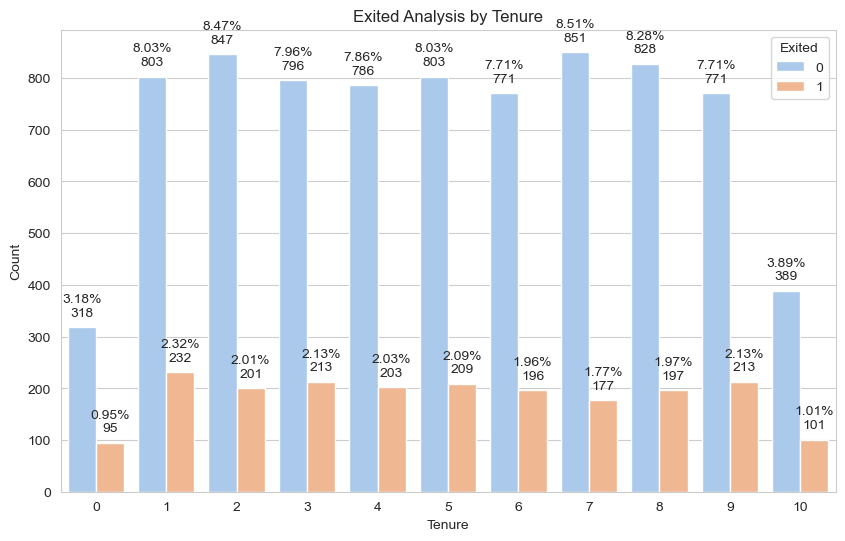

In [12]:
ax = sns.countplot(x = "Tenure", data=df, palette="pastel", hue = "Exited")
for p in ax.patches:
    yuzde_degeri = 100 * p.get_height() / toplam_gozlem_sayisi
    ax.annotate(f'{yuzde_degeri:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = "center", va = "center", xytext = (0, 20), textcoords = "offset points")
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel("Count")
plt.xlabel("Tenure")
plt.title("Exited Analysis by Tenure")

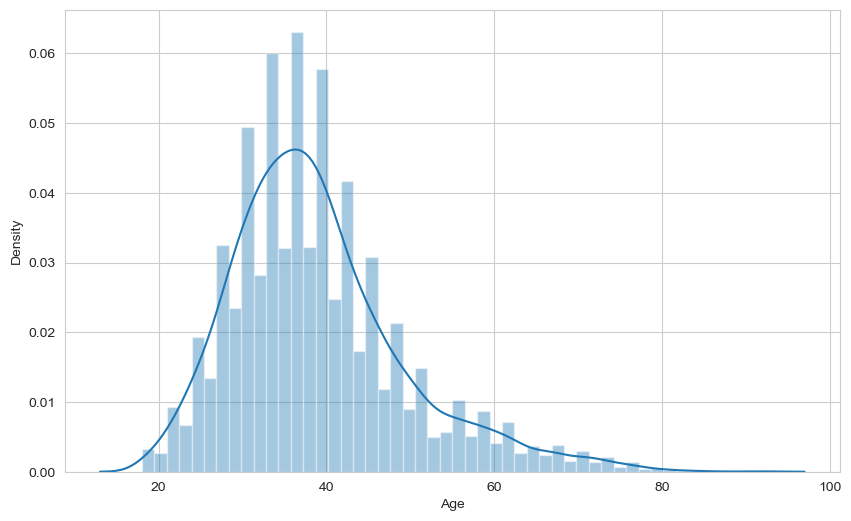

In [13]:
sns.distplot(df["Age"]);

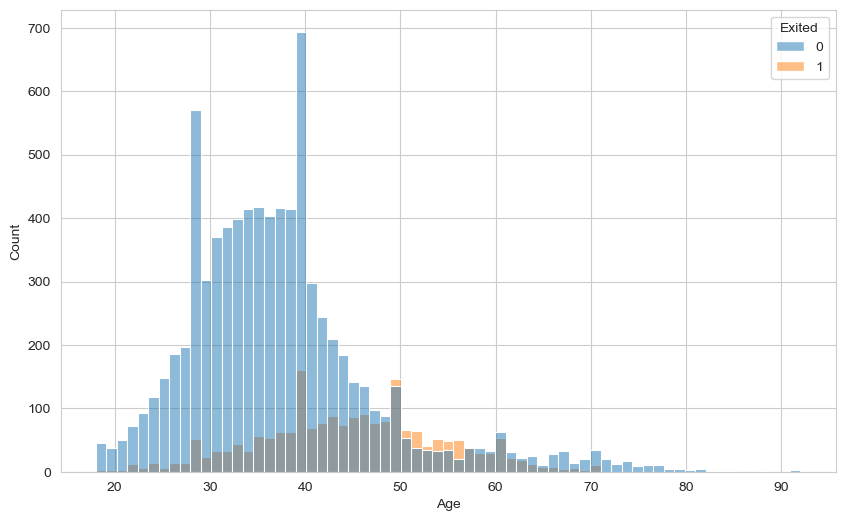

In [14]:
sns.histplot(data = df, x = "Age", hue = "Exited", fill = True);

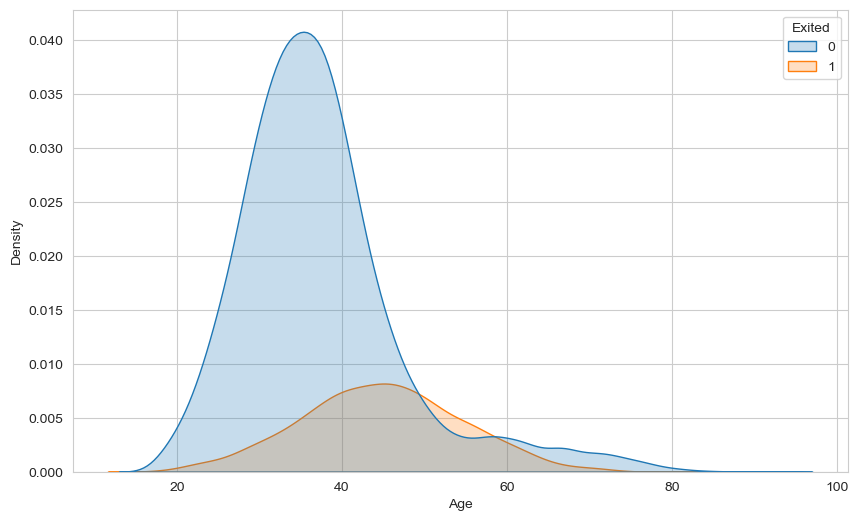

In [15]:
sns.kdeplot(data = df, x = "Age", hue = "Exited", fill=True);

In [16]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

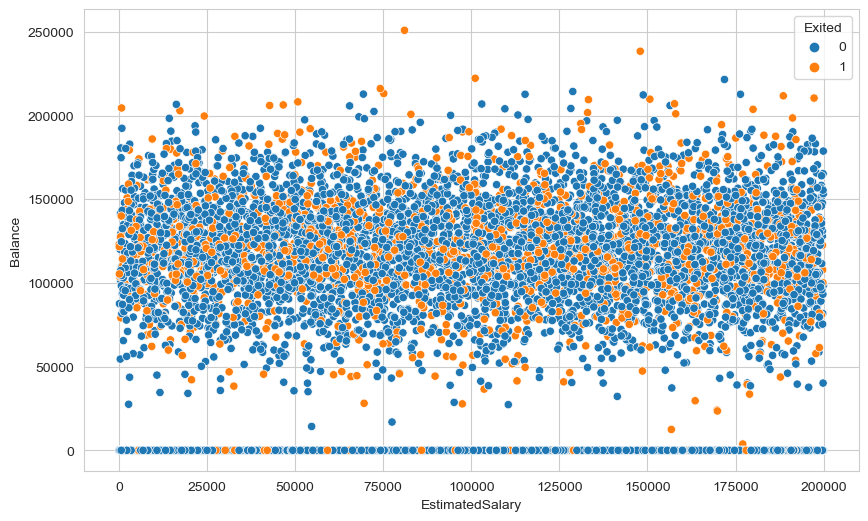

In [17]:
sns.scatterplot(x="EstimatedSalary", y="Balance", data = df ,hue = "Exited")

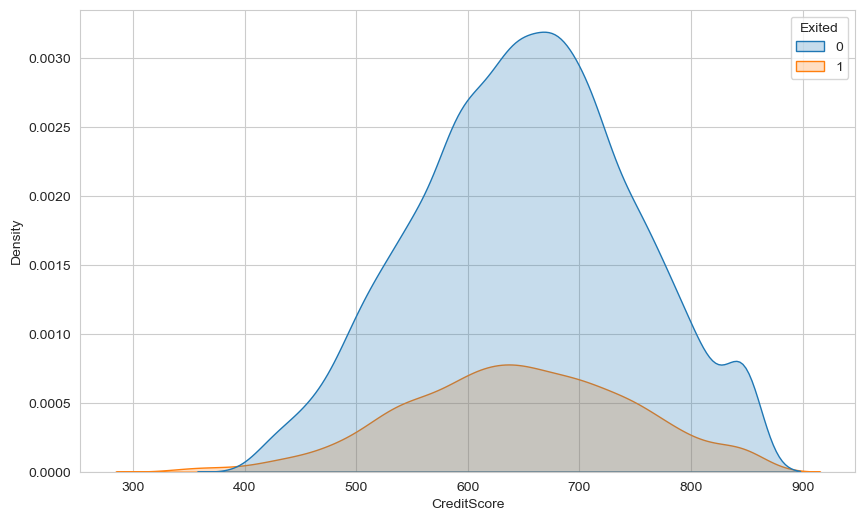

In [18]:
sns.kdeplot(data = df, x = "CreditScore", hue = "Exited", fill=True);

<Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>

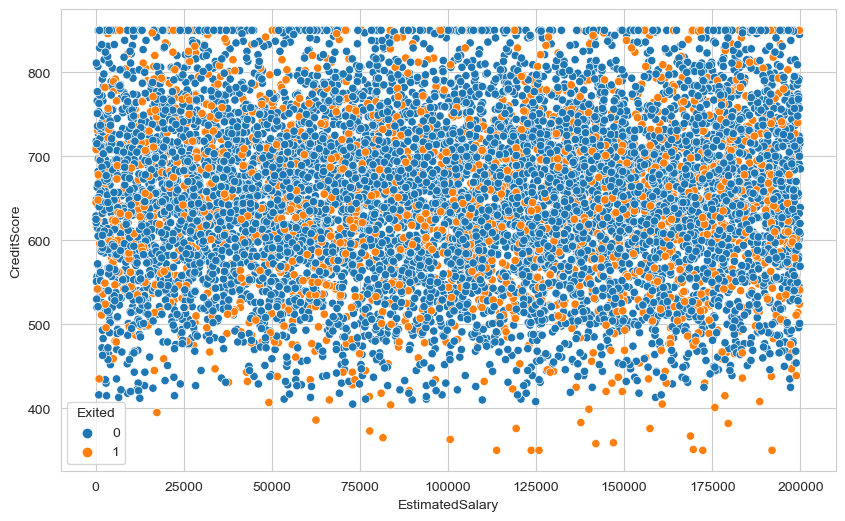

In [19]:
sns.scatterplot(x="EstimatedSalary", y="CreditScore", data = df ,hue = "Exited")

- Tabloda kredi notu 400'un altında olan müşterilerden yalnızca hesabını kapatanlar var.

In [20]:
df.replace({"France": 0, "Spain": 1, "Germany": 2}, inplace = True) 
df.replace({"Female": 0, "Male": 1}, inplace = True) 

In [21]:
from scipy.stats import shapiro

stat, p_value = shapiro(df)

if p_value > 0.05:
    print("Veri seti normal dağılıma sahiptir.")
else:
    print("Veri seti normal dağılıma sahip değildir.")

Veri seti normal dağılıma sahip değildir.


<Axes: >

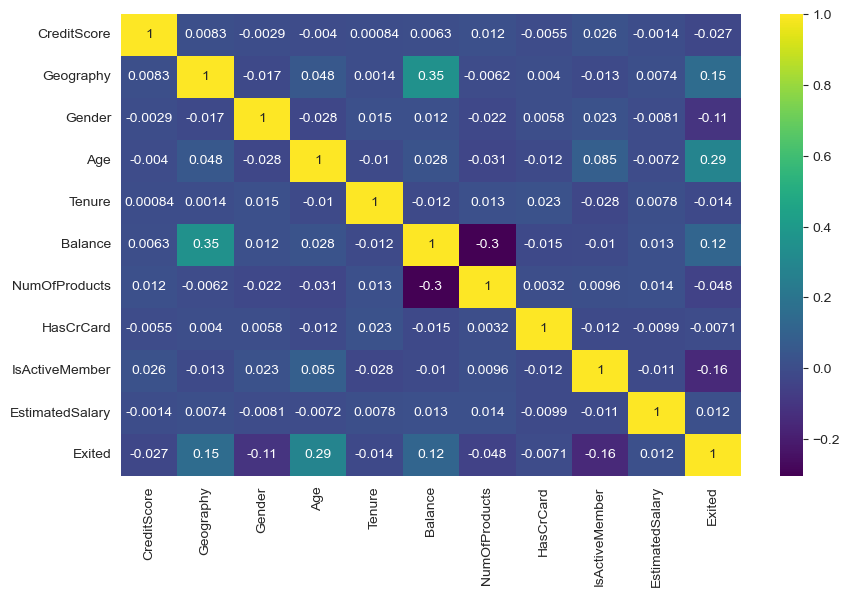

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# Train - Test Split

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
X = df.drop("Exited", axis = 1)
y = df["Exited"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

# Preprocessing of Data

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## Without Class Weigth

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
#rastgele sayı başlangıç durumunu belirle
tf.random.set_seed(42)

# Sequential modeli oluştur
model = Sequential()

# modelde 4 katman bulunmaktadır:
# ilk katman 32 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))

# ikinci katman 16 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(16, activation = "relu"))

# üçüncü katman 8 nörona sahip übir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(8, activation = "relu"))

# dördüncü katman tek nörona sahip bir çıkış katmanıdır. Sigmoid fonksiyonu kullanılmıştır.
model.add(Dense(1, activation = "sigmoid"))

# Adam optimizer'ı kullanılarak learning rate 0.001'e eşitlenir. Gradient descent tabanlı bir optimize edici algoritmadır.
opt = Adam(lr = 0.001)

# Modelin derlenmesi
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [29]:
# modelin fit edilmesi
# eğitim verisinin %10'u doğrulama verisi olarak ayrılır
# her bir eğitim iterasyonunda 128 örnek kullanılacak
# model 300 kez eğitim verisi üzerinden geçecek
# eğitim ilerlemesini çıktı olarak göstermeyecek
model.fit(x = X_train, y = y_train, validation_split = .1, batch_size = 128, epochs = 300, verbose = 0)

In [30]:
# modelin özeti
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


<Axes: >

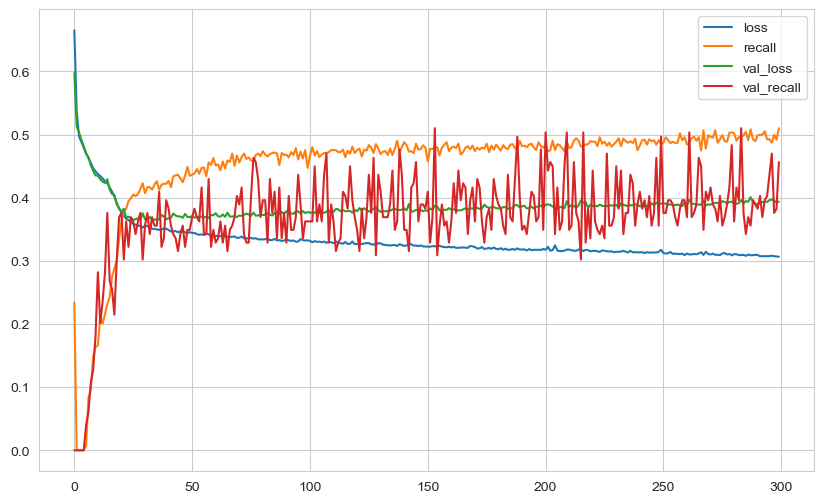

In [31]:
# model.fit() fonksiyonu ile metriklerin tutulduğu history'i loss_df adında bir dataframe aktararak plot olarak gösterilmesi
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [32]:
# çıktılar eğer 0.5'ten büyükse True (1), değilse False (0) olarak 2 grupta sınıflandırılır
y_pred = model.predict(X_test) > 0.5

#gerçek değerler ve tahmin edilen değerler arasındaki confusion matrix'ini yazdırır
print(confusion_matrix(y_test, y_pred))

# modelin performansını değerlendirmek üzere hata metriklerinin değerlerini yazdırır
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[2275  114]
 [ 307  304]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2389
           1       0.73      0.50      0.59       611

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



### Precision - Recall Curve and AP (Average Precision) for Model

94/94 [==============================] - 0s 944us/step


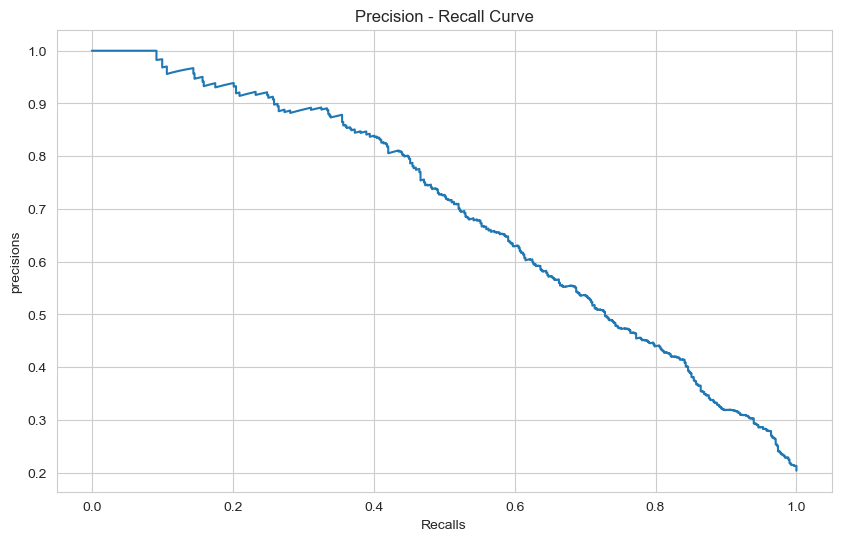

In [33]:
# modelin test verileri üzerinde tahmin olasılıklarının hesaplanması
y_pred_proba = model.predict(X_test)

# hassasiyet ve geri çağırma değerlerinin hesaplanması
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# görselleştirme
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("precisions")
plt.title("Precision - Recall Curve")
plt.show()

In [34]:
# (AUC-PR) ortalama hassasiyetinin hesaplanması
average_precision_score(y_test, y_pred_proba)

0.6905163361234575

- Not: Average precision score 0 ile 1 arasında bir değer alır. 1'e ne kadar yakınsa, modelin performansı o kadar iyidir

## With Class Weigth

In [35]:
#rastgele sayı başlangıç durumunu belirle
tf.random.set_seed(42)

# Sequential modeli oluştur
model = Sequential()

# modelde 4 katman bulunmaktadır:
# ilk katman 32 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))

# ikinci katman 16 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(16, activation = "relu"))
         
# üçüncü katman 8 nörona sahip übir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.)
model.add(Dense(8, activation = "relu"))
          
# dördüncü katman tek nörona sahip bir çıkış katmanıdır. Sigmoid fonksiyonu kullanılmıştır.
model.add(Dense(1, activation = "sigmoid"))

# Adam optimizer'ı kullanılarak learning rate 0.001'e eşitlenir. Gradient descent tabanlı bir optimize edici algoritmadır.          
opt = Adam(lr = 0.001)
          
# Modelin derlenmesi
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [36]:
# ilgili kütüphanenin yüklenmesi
from sklearn.utils import class_weight

# dengeli bir sınıf ağırlığına sahip olacak şekilde sınıf ağırlıklarının hesaplanması
class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)

# sınıf ağırlıklarının sözlüğe dönüştürülmesi
class_weights = {0: class_weights[0], 1: class_weights[1]}

# sınıf ağırlıklarına ait değerlerin yazılması
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

In [37]:
# modelin fit edilmesi
# eğitim verisinin %10'u doğrulama verisi olarak ayrılır
# her bir eğitim iterasyonunda 128 örnek kullanılacak
# model 300 kez eğitim verisi üzerinden geçecek
# eğitim ilerlemesini çıktı olarak göstermeyecek
# hesaplanan sınıf ağırlıklarına göre sınıflandırma yapılacak
model.fit(x = X_train, y = y_train, validation_split = .1, batch_size = 128, epochs = 300, verbose = 0,
          class_weight = class_weights)

<Axes: >

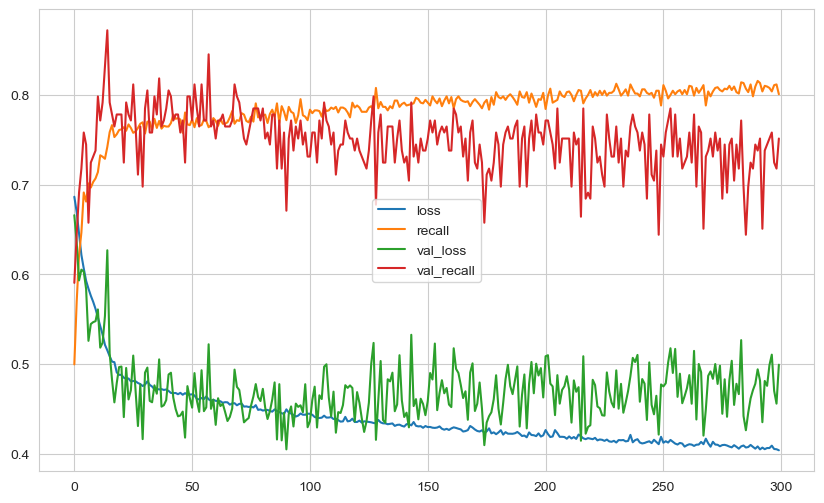

In [38]:
# model.fit() fonksiyonu ile metriklerin tutulduğu history'i loss_df2 adında bir dataframe aktararak plot olarak gösterilmesi
loss_df2 = pd.DataFrame(model.history.history)
loss_df2.plot()

In [39]:
# çıktılar eğer 0.5'ten büyükse True (1), değilse False (0) olarak 2 grupta sınıflandırılır
y_pred = model.predict(X_test) > 0.5

#gerçek değerler ve tahmin edilen değerler arasındaki confusion matrix'ini yazdırır
print(confusion_matrix(y_test, y_pred))

# modelin performansını değerlendirmek üzere hata metriklerinin değerlerini yazdırır
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1819  570]
 [ 167  444]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2389
           1       0.44      0.73      0.55       611

    accuracy                           0.75      3000
   macro avg       0.68      0.74      0.69      3000
weighted avg       0.82      0.75      0.77      3000



### Precision - Recall Curve and AP (Average Precision) for Model

94/94 [==============================] - 0s 923us/step


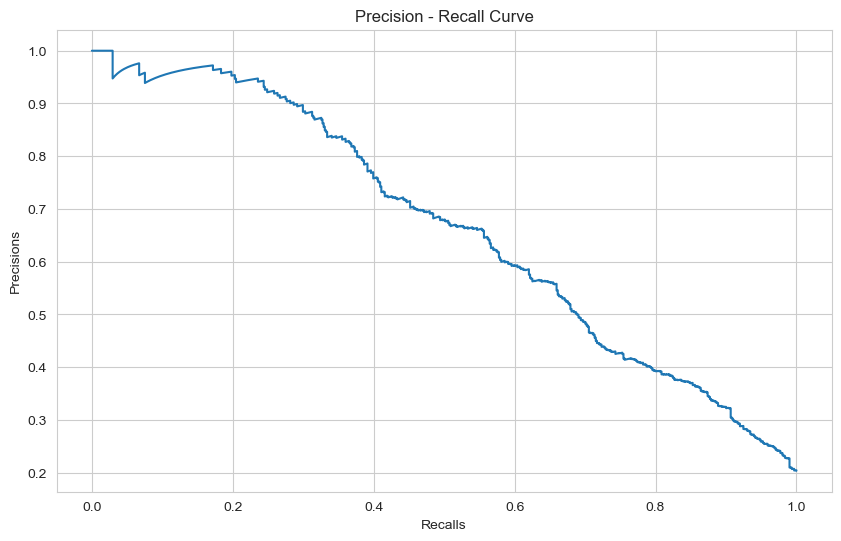

In [40]:
# modelin test verileri üzerinde tahmin olasılıklarının hesaplanması
y_pred_proba = model.predict(X_test)

# hassasiyet ve geri çağırma değerlerinin hesaplanması
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# görselleştirme
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision - Recall Curve")
plt.show()

In [41]:
# (AUC-PR) ortalama hassasiyetinin hesaplanması
average_precision_score(y_test, y_pred_proba)

0.6651250589450967

# Adding Early Stop

## Monitor the "val_loss" as metric

In [42]:
#rastgele sayı başlangıç durumunu belirle
tf.random.set_seed(42)

# Sequential modeli oluştur
model = Sequential()

# modelde 4 katman bulunmaktadır:
# ilk katman 32 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))

# overfittinge karşı 0.2 nöronu devre dışı bırakarak modelin farklı kombinasyonlar ile öğrenmesini sağlar.
model.add(Dropout(0.2))

# ikinci katman 16 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(16, activation = "relu"))

# overfittinge karşı 0.2 nöronu devre dışı bırakarak modelin farklı kombinasyonlar ile öğrenmesini sağlar.
model.add(Dropout(0.2))

# üçüncü katman 8 nörona sahip übir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.)
model.add(Dense(8, activation = "relu"))

# overfittinge karşı 0.2 nöronu devre dışı bırakarak modelin farklı kombinasyonlar ile öğrenmesini sağlar.
model.add(Dropout(0.2))

# dördüncü katman tek nörona sahip bir çıkış katmanıdır. Sigmoid fonksiyonu kullanılmıştır.
model.add(Dense(1, activation = "sigmoid"))

# Adam optimizer'ı kullanılarak learning rate 0.001'e eşitlenir. Gradient descent tabanlı bir optimize edici algoritmadır. 
opt = Adam(lr = 0.005)

# Modelin derlenmesi
model.compile(optimizer = opt, loss="binary_crossentropy", metrics = ["Recall"])

In [43]:
# geri çağırma sınıfı oluşturulacak
# validation set üzerindeki kaybı izlenecek
# kayıp minimize edilecek
# çıktılar görünmeyecek
# modelin performansında bir iyileşme görmek için 25 epoch bekleyecek
# overfittingi en aza indirmek için model eğitimi durduğunda en iyi performans gösteren ağırlıklar kullanılacak
early_stop = EarlyStopping(monitor="val_loss", mode = "min", verbose = 0, patience = 25, restore_best_weights = True)

In [44]:
# modelin fit edilmesi
# eğitim verisinin %10'u doğrulama verisi olarak ayrılır
# her bir eğitim iterasyonunda 128 örnek kullanılacak
# model 300 kez eğitim verisi üzerinden geçecek
# eğitim ilerlemesini çıktı olarak göstermeyecek
# hesaplanan sınıf ağırlıklarına göre sınıflandırma yapılacak
# önceden tanımlanmış geri çağırma işlevini çağıracak
model.fit(x = X_train, y = y_train, validation_split = .1, batch_size = 128, epochs = 300, verbose = 0, 
          callbacks = [early_stop], class_weight = class_weights)

<Axes: >

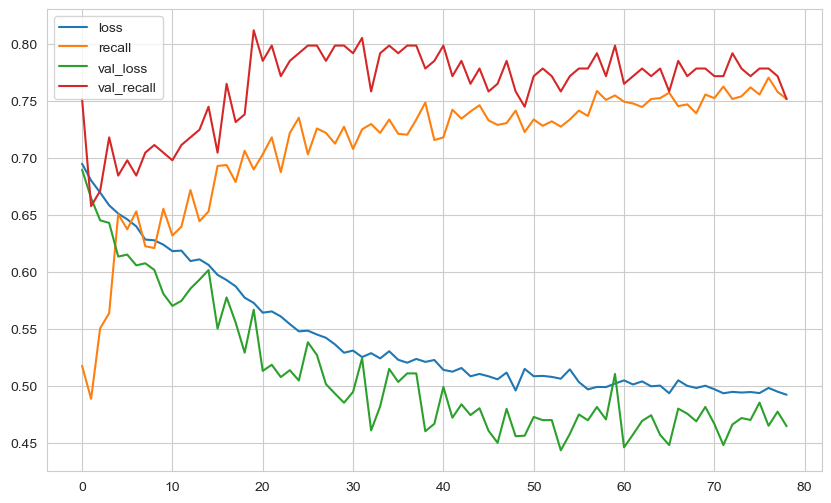

In [45]:
# model.fit() fonksiyonu ile metriklerin tutulduğu history'i loss_df3 adında bir dataframe aktararak plot olarak gösterilmesi
loss_df3 = pd.DataFrame(model.history.history)
loss_df3.plot()

In [46]:
# çıktılar eğer 0.5'ten büyükse True (1), değilse False (0) olarak 2 grupta sınıflandırılır
y_pred = model.predict(X_test) > 0.5

#gerçek değerler ve tahmin edilen değerler arasındaki confusion matrix'ini yazdırır
print(confusion_matrix(y_test, y_pred))

# modelin performansını değerlendirmek üzere hata metriklerinin değerlerini yazdırır
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1945  444]
 [ 160  451]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.87      2389
           1       0.50      0.74      0.60       611

    accuracy                           0.80      3000
   macro avg       0.71      0.78      0.73      3000
weighted avg       0.84      0.80      0.81      3000



## Monitor the "val_recall" as metric

In [47]:
#rastgele sayı başlangıç durumunu belirle
tf.random.set_seed(42)

# Sequential modeli oluştur
model = Sequential()

# modelde 4 katman bulunmaktadır:
# ilk katman 32 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))

# overfittinge karşı 0.2 nöronu devre dışı bırakarak modelin farklı kombinasyonlar ile öğrenmesini sağlar.
model.add(Dropout(0.2))

# ikinci katman 16 nörona sahip bir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.
model.add(Dense(16, activation = "relu"))

# overfittinge karşı 0.2 nöronu devre dışı bırakarak modelin farklı kombinasyonlar ile öğrenmesini sağlar.
model.add(Dropout(0.2))

# üçüncü katman 8 nörona sahip übir gizli katmandır. Relu aktivasyon fonksiyonu kullanılmıştır.)
model.add(Dense(8, activation = "relu"))

# overfittinge karşı 0.2 nöronu devre dışı bırakarak modelin farklı kombinasyonlar ile öğrenmesini sağlar.
model.add(Dropout(0.2))

# dördüncü katman tek nörona sahip bir çıkış katmanıdır. Sigmoid fonksiyonu kullanılmıştır.
model.add(Dense(1, activation = "sigmoid"))

# Adam optimizer'ı kullanılarak learning rate 0.001'e eşitlenir. Gradient descent tabanlı bir optimize edici algoritmadır.
opt = Adam(lr = 0.005)

# Modelin derlenmesi
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [48]:
# geri çağırma sınıfı oluşturulacak
# validation set üzerindeki kaybı izlenecek
# kayıp maksimize edilecek
# çıktılar görünmeyecek
# modelin performansında bir iyileşme görmek için 25 epoch bekleyecek
# overfittingi en aza indirmek için model eğitimi durduğunda en iyi performans gösteren ağırlıklar kullanılacak
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 0, patience = 25, restore_best_weights = True)

In [49]:
# modelin fit edilmesi
# eğitim verisinin %10'u doğrulama verisi olarak ayrılır
# her bir eğitim iterasyonunda 128 örnek kullanılacak
# model 300 kez eğitim verisi üzerinden geçecek
# eğitim ilerlemesini çıktı olarak göstermeyecek
# hesaplanan sınıf ağırlıklarına göre sınıflandırma yapılacak
# önceden tanımlanmış geri çağırma işlevini çağıracak
model.fit(x = X_train, y = y_train, validation_split = .1, batch_size = 128, epochs = 300, verbose = 0, 
          callbacks = [early_stop], class_weight = class_weights)

<Axes: >

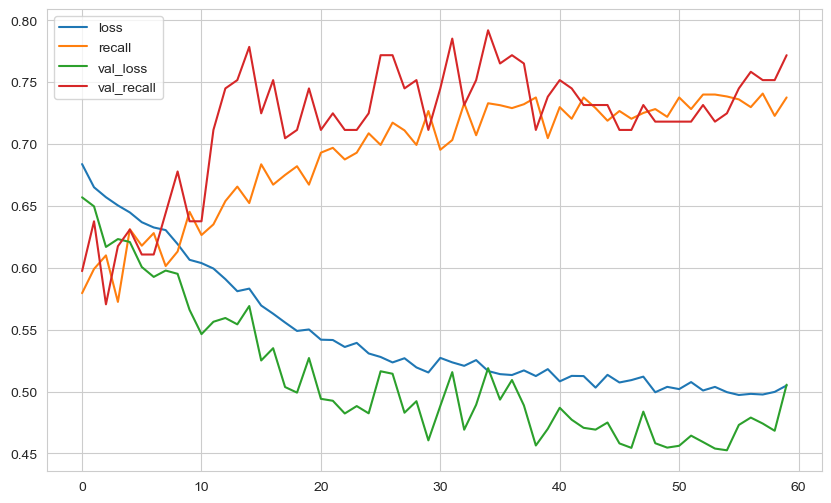

In [50]:
# model.fit() fonksiyonu ile metriklerin tutulduğu history'i loss_df4 adında bir dataframe aktararak plot olarak gösterilmesi
loss_df4 = pd.DataFrame(model.history.history)
loss_df4.plot()

In [51]:
# çıktılar eğer 0.5'ten büyükse True (1), değilse False (0) olarak 2 grupta sınıflandırılır
y_pred = model.predict(X_test) > 0.5

#gerçek değerler ve tahmin edilen değerler arasındaki confusion matrix'ini yazdırır
print(confusion_matrix(y_test, y_pred))

# modelin performansını değerlendirmek üzere hata metriklerinin değerlerini yazdırır
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1736  653]
 [ 111  500]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      2389
           1       0.43      0.82      0.57       611

    accuracy                           0.75      3000
   macro avg       0.69      0.77      0.69      3000
weighted avg       0.84      0.75      0.77      3000



# GridSearchCV

In [52]:
# ilgili kütüphanelerin yüklenmesi
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [53]:
# keras modeli inşa etmek için sinir ağı modeli oluşturup, 
# verilen optimizer (eniyileştirici) ve öğrenme oranı (learning rate) ile modeli derler
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = "sigmoid"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = "binary_crossentropy", metrics = ["Recall"])
    return classifier

In [54]:
# oluşturulan sınıf ağırlığı sözlüğünün değerlerini gösterir
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

In [55]:
# geri çağırma sınıfı oluşturulacak
# validation set üzerindeki kaybı izlenecek
# kayıp maksimize edilecek
# çıktılar görünmeyecek
# modelin performansında bir iyileşme görmek için 15 epoch bekleyecek
# overfittingi en aza indirmek için model eğitimi durduğunda en iyi performans gösteren ağırlıklar kullanılacak
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 0, patience = 15, restore_best_weights = True)

In [56]:
#rastgele sayı başlangıç durumunu belirle
tf.random.set_seed(42)

# GridSearchCV tarafından kullanılacak olan sınıflandırının tanımlanması
classifier = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

# GridSearchCV tarafından test edilecek hiperparametrelerin seçilmesi 
parameters = {"batch_size": [128, 256],
              "optimizer": [Adam, RMSprop, Adadelta, Nadam],
              "learn_rate": [0.001, 0.003, 0.005]}

# GridSearchCV nesnesini oluşturur
grid_model = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = "recall", cv = 5, n_jobs = -1, verbose = 0)

# modeli fit eder
grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weights)

Epoch 1/200
50/50 [==============================] - 1s 6ms/step - loss: 0.6702 - recall: 0.6006 - val_loss: 0.6028 - val_recall: 0.5973
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6517 - recall: 0.6226 - val_loss: 0.6000 - val_recall: 0.6510
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6348 - recall: 0.6688 - val_loss: 0.5542 - val_recall: 0.5772
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6178 - recall: 0.6680 - val_loss: 0.6629 - val_recall: 0.8121
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6056 - recall: 0.6829 - val_loss: 0.5928 - val_recall: 0.8054
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.5778 - recall: 0.6993 - val_loss: 0.7279 - val_recall: 0.9060
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.5620 - recall: 0.7275 - val_loss: 0.4697 - val_recall: 0.7114
Epoch 8/200
50/50 [======================

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025F928B3110>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.adam.Adam'>,
                                       <class 'keras.optimizers.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.nadam.Nadam'>]},
             scoring='recall')

In [57]:
# GridSearchCV tarafından en iyi performans gösteren modelin elde ettiği skoru gösterme
grid_model.best_score_

0.8263485260539681

In [58]:
# en iyi performans gösteren modelin hiperparametrelerini gösterir
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.rmsprop.RMSprop}

In [59]:
# çıktılar eğer 0.5'ten büyükse True (1), değilse False (0) olarak 2 grupta sınıflandırılır
y_pred = grid_model.predict(X_test)

#gerçek değerler ve tahmin edilen değerler arasındaki confusion matrix'ini yazdırır
print(confusion_matrix(y_test, y_pred))

# modelin performansını değerlendirmek üzere hata metriklerinin değerlerini yazdırır
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[1123 1266]
 [  53  558]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63      2389
           1       0.31      0.91      0.46       611

    accuracy                           0.56      3000
   macro avg       0.63      0.69      0.54      3000
weighted avg       0.82      0.56      0.60      3000



# Final Model and Model Deployment

In [60]:
# ilgili kütüphanelerin yüklenmesi
import pickle

# model kullanılmak istenildiğinde tekrar kullanabilsin diye bir dosyaya kaydetme
pickle.dump(scaler, open("churn_prediction", "wb"))

In [61]:
#rastgele sayı başlangıç durumunu belirle
tf.random.set_seed(42)

# Sequential modeli oluştur
model = Sequential()

# modelde 3 katman bulunmaktadır:
model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# Adam optimizer'ı kullanılarak learning rate 0.005'e eşitlenir. Gradient descent tabanlı bir optimize edici algoritmadır.
opt = RMSprop(lr = 0.005)

# modelin derlenmesi 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

# geri çağırma sınıfı oluşturulması
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

# modelin fit edilmesi 
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), callbacks = [early_stop],
          batch_size = 128, epochs = 200, verbose = 0, class_weight = class_weights)

Restoring model weights from the end of the best epoch: 55.
Epoch 70: early stopping


<Axes: >

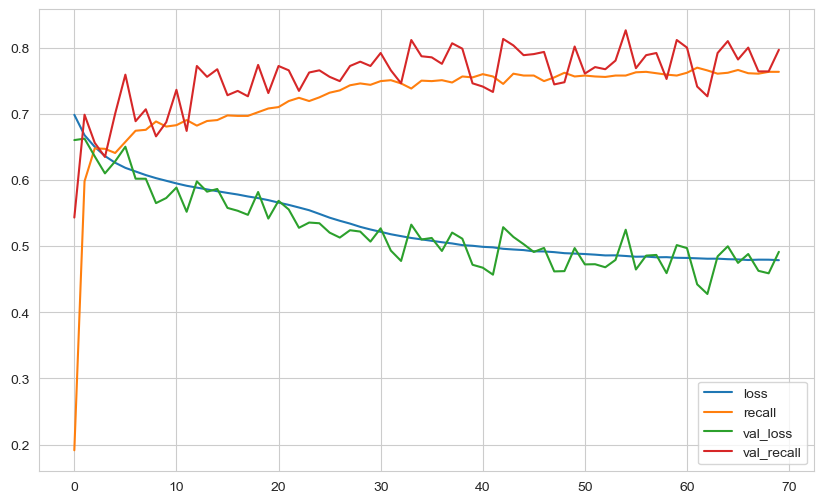

In [62]:
# model.fit() fonksiyonu ile metriklerin tutulduğu history'i loss_df5 adında bir dataframe aktararak plot olarak gösterilmesi
loss_df5 = pd.DataFrame(model.history.history)
loss_df5.plot()

In [63]:
# çıktılar eğer 0.5'ten büyükse True (1), değilse False (0) olarak 2 grupta sınıflandırılır
y_pred = model.predict(X_test) > 0.5

# gerçek değerler ve tahmin edilen değerler arasındaki confusion matrix'ini yazdırır
print(confusion_matrix(y_test, y_pred))

# modelin performansını değerlendirmek üzere hata metriklerinin değerlerini yazdırır
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1676  713]
 [ 106  505]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      2389
           1       0.41      0.83      0.55       611

    accuracy                           0.73      3000
   macro avg       0.68      0.76      0.68      3000
weighted avg       0.83      0.73      0.75      3000



In [64]:
# çıktılar eğer 0.5'ten büyükse True (1), değilse False (0) olarak 2 grupta sınıflandırılır
y_pred = model.predict(X_test) > 0.5

# gerçek değerler ve tahmin edilen değerler arasındaki confusion matrix'ini yazdırır
print(confusion_matrix(y_test, y_pred))

# modelin performansını değerlendirmek üzere hata metriklerinin değerlerini yazdırır
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1676  713]
 [ 106  505]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      2389
           1       0.41      0.83      0.55       611

    accuracy                           0.73      3000
   macro avg       0.68      0.76      0.68      3000
weighted avg       0.83      0.73      0.75      3000



In [65]:
# modelin kaydedilmesi
model.save("model_churn.h5")

## Prediction

In [66]:
# exited sütununun olmadığı yeni bir dataframe oluşturur
single_customer = df.drop("Exited", axis = 1).iloc[0]
single_customer

CreditScore          619.000
Geography              0.000
Gender                 0.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Name: 0, dtype: float64

In [67]:
# yeni oluşturulan dataframe'in verilerin modele uyygun hale ölçeklendirilmesi
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489]])

In [68]:
# modelin tahminlerini yapması
model.predict(single_customer)

1/1 [==============================] - 0s 19ms/step


array([[0.5893758]], dtype=float32)

In [69]:
# dataframedeki exited sütunundaki sonuçun gösterilmesi
df["Exited"].iloc[0]

1

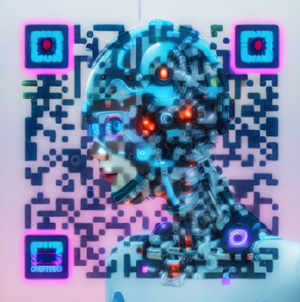